In [97]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import *
from matplotlib.pyplot import figure
import re
import graphviz
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [98]:
# Importing the dataset
dataset = pd.read_csv('drone_delivery_v1.csv',sep=';',index_col = 'clientid')
fd = pd.DataFrame(dataset)
fd

,x,y
clientid,,
1,622.771572,164.857623
2,416.357298,630.193634
3,292.735020,567.333231
4,737.211288,166.225676
5,540.475375,682.912298
...,...,...
5952,832.857394,616.861410
5953,242.734500,490.325092
5954,108.690847,758.833921


<Figure size 640x480 with 0 Axes>

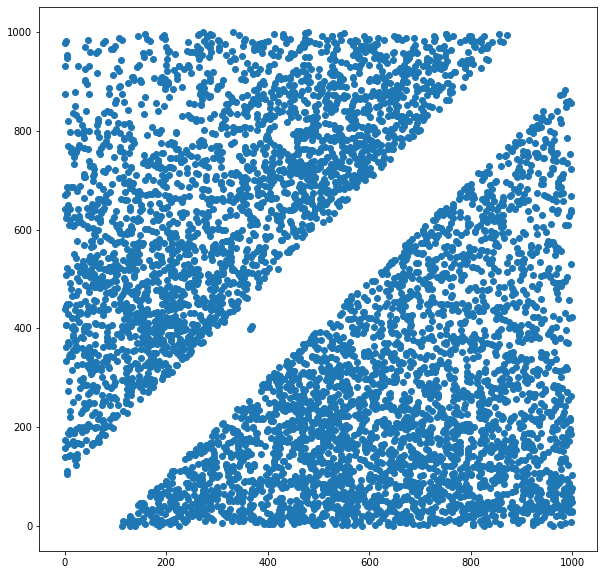

In [126]:
#Visualizing the client locations by making a two-dimensional scatterplot.
figure(num = None, figsize= (8,6),dpi=80, facecolor='w',edgecolor='k')
figure(figsize=(10,10))
plt.scatter(fd['x'],fd['y'])

In [100]:
colnames = fd.columns.get_values()
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(fd))
df_scaled.head()

/Users/zakaria/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  """Entry point for launching an IPython kernel.


,0,1
0,0.420414,-0.908923
1,-0.341154,0.701123
2,-0.797259,0.483628
3,0.842640,-0.904189
4,0.116781,0.883528


In [101]:
# Using k-means clustering, find optimal locations
n_clusters =3 
Kmeans = KMeans(n_clusters,random_state=0).fit(df_scaled)

In [102]:
centroids = np.array(Kmeans.cluster_centers_)

In [103]:
centroids

array([[ 0.69659709, -0.75840326],
       [-1.16233758, -0.07301927],
       [ 0.22774332,  1.23490674]])

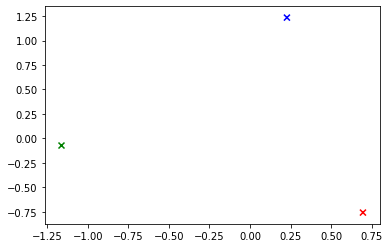

In [104]:
plt.scatter(centroids[:,0], centroids[:,1], marker = "x",color = ['r','g','b'])

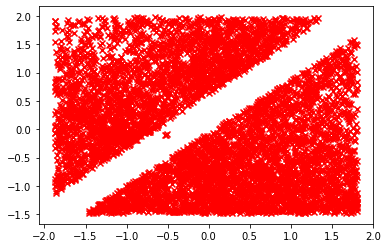

In [105]:
plt.scatter(df_scaled[0],df_scaled[1],marker = 'x', color = ['r'])

In [106]:
Kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [107]:
Kmeans.labels_

array([0, 2, 1, ..., 1, 0, 0], dtype=int32)

In [108]:
mydict = {i: np.where(Kmeans.labels_ == i)[0]for i in range(Kmeans.n_clusters) }

In [109]:
mydict

{0: array([   0,    3,    5, ..., 5946, 5954, 5955]),
 1: array([   2,    7,   10, ..., 5950, 5952, 5953]),
 2: array([   1,    4,    6, ..., 5945, 5947, 5951])}

In [110]:
Kmeans.labels_

array([0, 2, 1, ..., 1, 0, 0], dtype=int32)

In [111]:
ndf = pd.DataFrame(Kmeans.labels_)

In [112]:
ndf

,0
0,0
1,2
2,1
3,0
4,2
...,...
5951,2
5952,1
5953,1
5954,0


In [113]:
df = fd 

In [114]:
df.insert(2,'deport_identifier',Kmeans.labels_,True)

In [115]:
df

,x,y,deport_identifier
clientid,,,
1,622.771572,164.857623,0
2,416.357298,630.193634,2
3,292.735020,567.333231,1
4,737.211288,166.225676,0
5,540.475375,682.912298,2
...,...,...,...
5952,832.857394,616.861410,2
5953,242.734500,490.325092,1
5954,108.690847,758.833921,1


In [127]:
# Print the first 10 rows of the new data frame.
print(df[0:10])

                   x           y  deport_identifier
clientid                                           
1         622.771572  164.857623                  0
2         416.357298  630.193634                  2
3         292.735020  567.333231                  1
4         737.211288  166.225676                  0
5         540.475375  682.912298                  2
6         535.469492  318.439661                  0
7         640.380050  870.833221                  2
8         235.772075  359.048203                  1
9         481.896884  661.491838                  2
10        730.032789  312.177817                  0


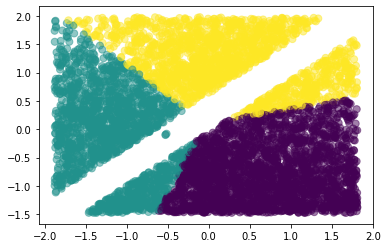

In [117]:
#Make a scatterplot that uses three different colours. The markers with the same colour are served by the same depot.
plt.scatter(df_scaled[0], df_scaled[1], c = Kmeans.labels_.astype(float), s= 50, alpha = 0.5)

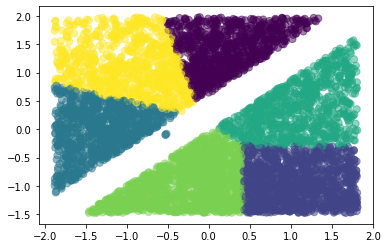

In [118]:
Kmeans = KMeans(n_clusters =6, random_state =0).fit(df_scaled)
centroids = np.array(Kmeans.cluster_centers_)
plt.scatter(df_scaled[0],df_scaled[1],c = Kmeans.labels_.astype(float), s= 50, alpha = 0.5)

In [128]:
# Replace k-means with agglomerative hierarchical clustering
from sklearn.cluster import AgglomerativeClustering 
ac= pd.read_csv('drone_delivery_v1.csv',sep=';',index_col = 'clientid')

In [120]:
dac = pd.DataFrame(ac)

In [121]:
clustering = AgglomerativeClustering(n_clusters= 5,linkage = 'average').fit(dac)

In [122]:
clustering.labels_

array([3, 0, 0, ..., 2, 1, 3])

In [123]:
clustering.n_clusters

5

In [124]:
scaler = StandardScaler()
dac_scaled = pd.DataFrame(scaler.fit_transform(dac))
dac_scaled.head()

,0,1
0,0.420414,-0.908923
1,-0.341154,0.701123
2,-0.797259,0.483628
3,0.842640,-0.904189
4,0.116781,0.883528


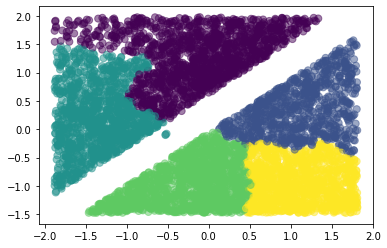

In [125]:
plt.scatter(dac_scaled[0],dac_scaled[1], c = clustering.labels_.astype(float), s= 50, alpha = 0.5)